### <font color='darkred'>Análise Estatística Para Data Science com Linguagem Python</font>

### <font color='darkgreen'>Lab 1 - Parte 1 - AST - Decomposição </font>
### <font color='darkblue'>Análise Estatística de Séries Temporais</font>

### <font color=darkred><b> O Processo de Análise de Séries Temporais</b> </font>

A análise de séries temporais é um processo estatístico que envolve a coleta, modelagem e previsão de dados ao longo do tempo. Ela é usada para identificar padrões, tendências e relações temporais nos dados, permitindo fazer previsões e tomar decisões informadas. O processo pode ser resumido nas seguintes etapas:

**1- Coleta de Dados**: Obtenção de dados sequenciais ao longo de um período de tempo. Os dados podem ser coletados em intervalos regulares (diários, mensais, anuais, etc.) ou irregulares.

**2- Visualização**: Análise gráfica das séries temporais para identificar padrões visuais, como sazonalidade, tendências, ciclos e ruídos. - Análise Exploratória

**3- Decomposição**: Separação dos componentes principais da série temporal, como tendência, sazonalidade e resíduos (ou ruído).

**4- Estacionariedade**: Verificação da estacionariedade dos dados, ou seja, se suas propriedades estatísticas permanecem constantes ao longo do tempo. Caso os dados não sejam estacionários, pode ser necessário aplicar transformações, como diferenciação ou logaritmo.

**5- Seleção do Modelo**: Escolha de um modelo adequado para ajustar os dados, como modelos ARIMA (Autoregressive Integrated Moving Average), SARIMA (Seasonal ARIMA), modelos de médias móveis exponenciais (EMA), modelos de estado espaço, entre outros.
Para detectar padrão na série temporal (Analise Estatistica) ou criar um modelo preditivo (Machine Learning).

**6- Estimativa de Parâmetros e Validação**: Ajuste do modelo escolhido aos dados e verificação de sua adequação por meio de métricas de desempenho, como erro quadrático médio (MSE), erro absoluto médio (MAE) e coeficiente de determinação (R²).
Compreende se o modelo conseguiu capturar a eassencia da Série Temporal.

**7- Previsão (Forecast)**: Utilização do modelo ajustado para realizar previsões futuras, com base nos padrões identificados na série temporal.

**8- Avaliação e Atualização**: Monitoramento do desempenho do modelo em relação às novas observações e ajuste dos parâmetros, se necessário, para melhorar as previsões futuras.

No Lab 1 trabalharemos nos itens de 1 a 4.

### <font color=darkred> <b> Instalando e Carregando os Pacotes </b> </font> 

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install matplotlib==3.7.1

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import statsmodels.api as sm #fazer a decomposição da ST
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

pandas     : 1.5.3
matplotlib : 3.7.1
statsmodels: 0.13.2
numpy      : 1.22.4
seaborn    : 0.11.2



### <font color=darkred> <b> Carregando e Explorando Dados </b> </font> 

In [5]:
# Carregando os dados
dados = pd.read_csv('dados/dataset.csv', header = None) # sem cabeçalho do arquivo

In [6]:
# Visualizando os Dados 
dados.head()

,0,1
0,2012-01,113
1,2012-02,119
2,2012-03,134
3,2012-04,129
4,2012-05,121


Perceba que são duas colunas de dados, a 1ª coluna indexação feita pelo Pandas. 
Esses dados representam uma **série univariada**, pois temos uma variável aleatória (veículos produzidos) e a data, que representa o **índice da série**. Veja que a série é mensal.

Vamos ajustar o nome de cada coluna.

In [7]:
# Ajustando o nome de cada coluna
dados.columns = ['mes', 'veiculos_produzidos']

In [8]:
# Visualizando os Dados
dados.head()

,mes,veiculos_produzidos
0,2012-01,113
1,2012-02,119
2,2012-03,134
3,2012-04,129
4,2012-05,121


In [9]:
# Shape dos Dados
dados.shape

(144, 2)

In [10]:
# Tipos dos Dados
dados.dtypes

mes                    object
veiculos_produzidos     int64
dtype: object

Observe que a coluna de data está como tipo object, que é a representação de string (tipo texto). 
Quem faz essa classificação, é o proprio pacote Pandas no momento que carrgamos os dados. Teremos que ajustar isso.

In [11]:
# Tipo do objeto - tipo geral do dataframe, objeto dados.
type(dados)

pandas.core.frame.DataFrame

In [12]:
# Resumo estatístico da variável veiculos_produzidos. A média é de 280.
# Padrão do Pandas - resumo estatístico só considera variáveis que ele classificou como numéricas
dados.describe()

,veiculos_produzidos
count,144.000000
mean,280.340278
std,119.917289
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [13]:
# Qual será o mês com o maior número de veículos produzidos? Usa a combinação das colunas! Legal
dados.max()

mes                    2023-12
veiculos_produzidos        622
dtype: object

In [14]:
# Vamos coletar o período completo da série temporal
print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(dados.mes.min(), dados.mes.max()))

Início do Período de Tempo: 2012-01
Final do Período de Tempo: 2023-12


### <font color=darkred> <b> Processamento e Visualização de Dados </b> </font> 

Vamos converter a data do tipo object (string) para o tipo apropriado, **datetime**, pois assim podemos usar métodos e atributos específicos de datas.

In [15]:
# Visualizando os Dados
dados.head()

,mes,veiculos_produzidos
0,2012-01,113
1,2012-02,119
2,2012-03,134
3,2012-04,129
4,2012-05,121


In [16]:
# Tipos dos Dados
dados.dtypes

mes                    object
veiculos_produzidos     int64
dtype: object

In [17]:
# Convertendo a coluna data de object para datetime - a coluna de data é usada como indice   
dados['mes'] = pd.to_datetime(dados['mes'], format = '%Y-%m')

In [18]:
# Tipos dos Dados
dados.dtypes

mes                    datetime64[ns]
veiculos_produzidos             int64
dtype: object

In [19]:
# Visualizando os Dados
dados.head()

,mes,veiculos_produzidos
0,2012-01-01,113
1,2012-02-01,119
2,2012-03-01,134
3,2012-04-01,129
4,2012-05-01,121


In [20]:
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
dados_serie = dados.set_index('mes')

In [21]:
# Visualizando os Dados
dados_serie.head()

,veiculos_produzidos
mes,
2012-01-01,113
2012-02-01,119
2012-03-01,134
2012-04-01,129
2012-05-01,121


Agora sim podemos chamar esse conjunto de dados de série temporal. Vamos visualizar o índice:

In [22]:
# Visualizando o índice
dados_serie.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='mes', length=144, freq=None)

In [23]:
# Será que algum valor nulo está presente nos dados?
dados_serie.isnull().sum()

veiculos_produzidos    0
dtype: int64

### <font color=darkgreen> Plot da Série Temporal - Primeira Análise de Tendência </font>

In [24]:
# Formatando as saídas dos gráficos -Usando o Pandas! Formatação generica para todos os gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

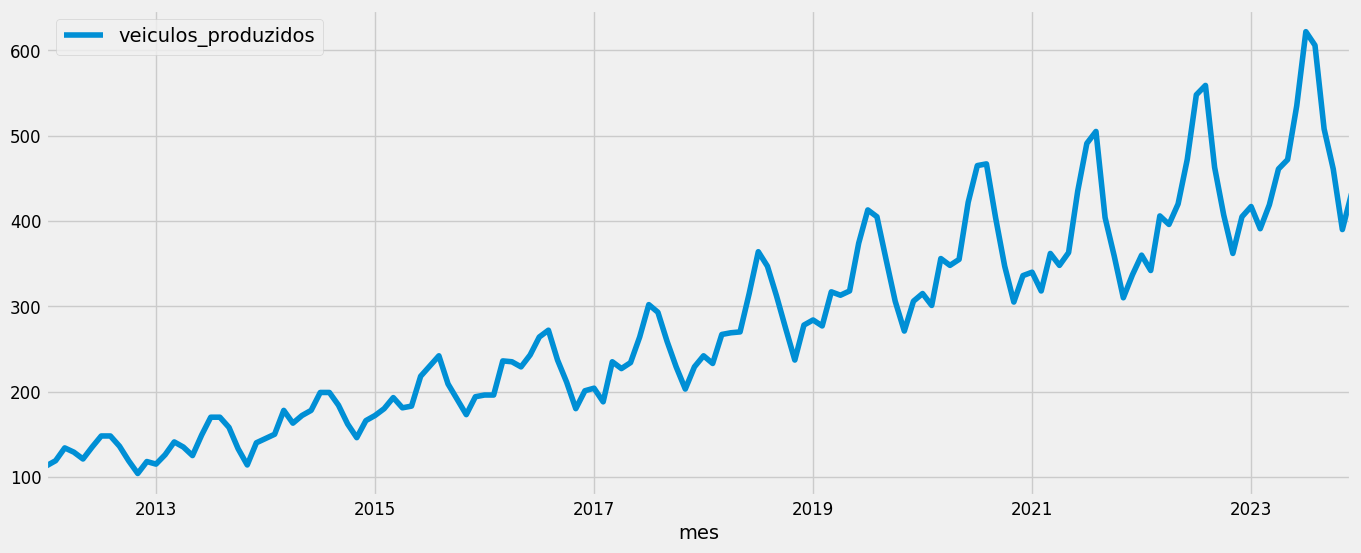

In [25]:
# Plot da Série Temporal - aqui já observamos algumas tendências.
dados_serie.plot(figsize = (15, 6))
plt.show()

O gráfico acima mostra 2 componentes da série: **Sazonalidade e Tendência.** 

- Sazonalidade - o fenômeno se repete em períodos fixos - topos e fundos
- Tendência - como a série se comporta ao longo do tempo, a série segue uma tendência de crescimento.

Outro aspecto a considerar é o comportamento cíclico. Isso acontece quando o padrão de subida e descida da série não ocorre em 
intervalos fixos baseados em calendário. Deve-se tomar cuidado para não confundir efeito "cíclico" com efeito "sazonal".

Mas, como diferenciar um padrão "cíclico" versus "sazonal"?

Se os padrões não tiverem frequências fixas baseadas em **calendário, será cíclico**. Porque, diferentemente da sazonalidade, 
os **efeitos cíclicos são tipicamente influenciados pelos negócios e outros fatores socioeconômicos.**

#### <font color=darkgreen> Gráfico de Densidade - Segunda Análise de Tendência </font>

Analisar o gráfico da densidade de observações pode fornecer mais informações sobre a estrutura dos dados. 
Vamos criar o gráfico: 

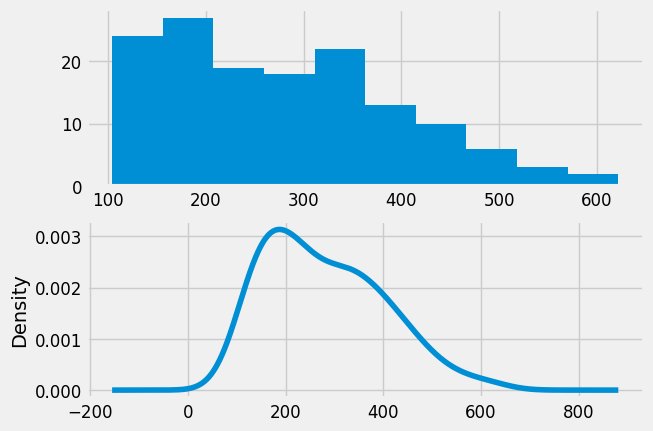

In [26]:
# Gráfico de Densidade

# Plot - área de plotagem
plt.figure(1)

# Dividiu a área de plotegem em 2 subplots, histograma e curva de densidade de probabilidade
# Subplot 1
plt.subplot(211)
dados_serie.veiculos_produzidos.hist()

# Subplot 2
plt.subplot(212)
dados_serie.veiculos_produzidos.plot(kind = 'kde')
plt.show()

Análise:
    
- A distribuição não é perfeitamente gaussiana (distribuição normal).Problema principal - Estacionaridade
- A distribuição está inclinada para a esquerda, assimetrica a direita
- As transformações podem ser úteis antes da modelagem.

#### <font color=darkgreen> Box Plots - Terceira Análise de Tendência </font>

Criando BoxPlots para cada ano da série.

Text(0, 0.5, '\nVeículos Produzidos')

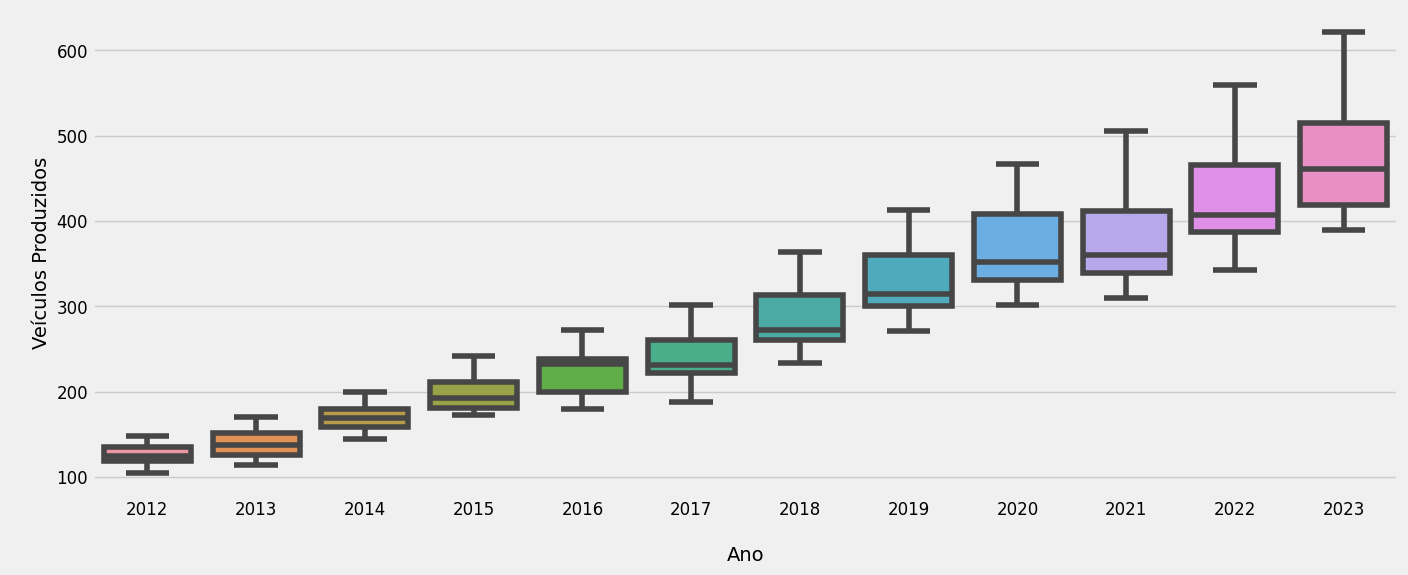

In [27]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize = (15,6))

# Define as variáveis para cada ano - resumo estatistica para cada ano
#pega o indice da variavel veiculos produzidos e extrai o ano
indice_ano = dados_serie.veiculos_produzidos.index.year 
valor = dados_serie.veiculos_produzidos

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(x = indice_ano, y = valor, ax = ax, data = dados_serie)

plt.xlabel("\nAno")
plt.ylabel("\nVeículos Produzidos")

Análise:

- O aumento da mediana ao longo dos anos confirma uma tendência ascendente. Crescimento da sério
- Aumento constante da dispersão ao redor da mediana dos dados ao longo do tempo. As caixas vão se tornando cada vez maiores. Efeito da tendencia de Crescimento. Valores minimos e máximos tb ficaram mais distantes ao longo do tempo.
- Um modelo considerando a sazonalidade pode funcionar bem para prever esta série. Existe um padrão.

Obs: Esse gráfico é o igual ao anterior, mas analisado por meio de boxplots

### <font color=darkred> <b> Visualizando a Decomposição da Série Temporal - Etapa 3</b> </font> 

A decomposição da série temporal é uma técnica que permite **separar uma série temporal em seus componentes constituintes**, com o objetivo de entender melhor a estrutura dos dados e facilitar a análise e a previsão. 

A ideia por trás dessa abordagem é que uma série temporal pode ser decomposta em três componentes principais:

**Tendência:** A tendência é a direção geral e de longo prazo na série temporal. Ela mostra o aumento ou a diminuição geral dos valores ao longo do tempo e pode ser linear ou não-linear.

**Sazonalidade:** A sazonalidade é o padrão regular de flutuações que ocorre em **intervalos fixos e conhecidos**. Essas variações são geralmente associadas a fenômenos naturais ou culturais, como as estações do ano, feriados ou eventos anuais.

**Resíduo  (ou  ruído  aleatório):** O resíduo é a parte da série temporal que não pode ser explicada pela tendência ou sazonalidade. Ele inclui variações aleatórias, erros de medição e outros fatores não sistêmicos que afetam os dados.

### <font color=darkred> <b> Existem  várias  abordagens  para  decompor  uma  série  temporal,  incluindo  métodos aditivos e multiplicativos:</b> </font>

**Modelo Aditivo**:  Nesse  caso,  a  série  temporal  é  considerada  a  soma  dos  três componentes mencionados acima:

- **Y(t) = Tendência(t) + Sazonalidade(t) + Resíduo(t)**

O modelo aditivo é mais adequado para séries temporais em que as **flutuações sazonais são aproximadamente constantes ao longo do tempo**.

**Modelo Multiplicativo**: Nesse caso, a série temporal é considerada o produto dos três componentes:

- **Y(t) = Tendência(t) × Sazonalidade(t) × Resíduo(t)**

O modelo multiplicativo é mais adequado para séries temporais em que as **flutuações sazonais aumentam ou diminuem proporcionalmente com a tendência**. Algumas  técnicas  comuns  para  decompor  séries  temporais  incluem  a  média  móvel, suavização exponencial e decomposição sazonal e tendência usando Loess.

- A escolha do método depende das características da série temporal e do objetivo da análise. Após a decomposição, os componentes individuais podem ser analisados e modelados separadamente e as previsões podem ser feitas combinando as previsões dos componentes individuais. 

In [28]:
# Decomposição Multiplicativa usando statsmodels sm e tsa pacote do sm fç seasonal_decompose
# Quebrando a série nos 4 componetes: Tendencia, sazonalidade, residuos e valor do veiculo produzido
# o parâmetro extrapolate_trend="freq" - remove valor nulo/na
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(dados_serie, 
                                                        model = 'multiplicative', 
                                                        extrapolate_trend = 'freq')

In [29]:
# Tipo do objeto
type(decomposicao_multiplicativa)

statsmodels.tsa.seasonal.DecomposeResult

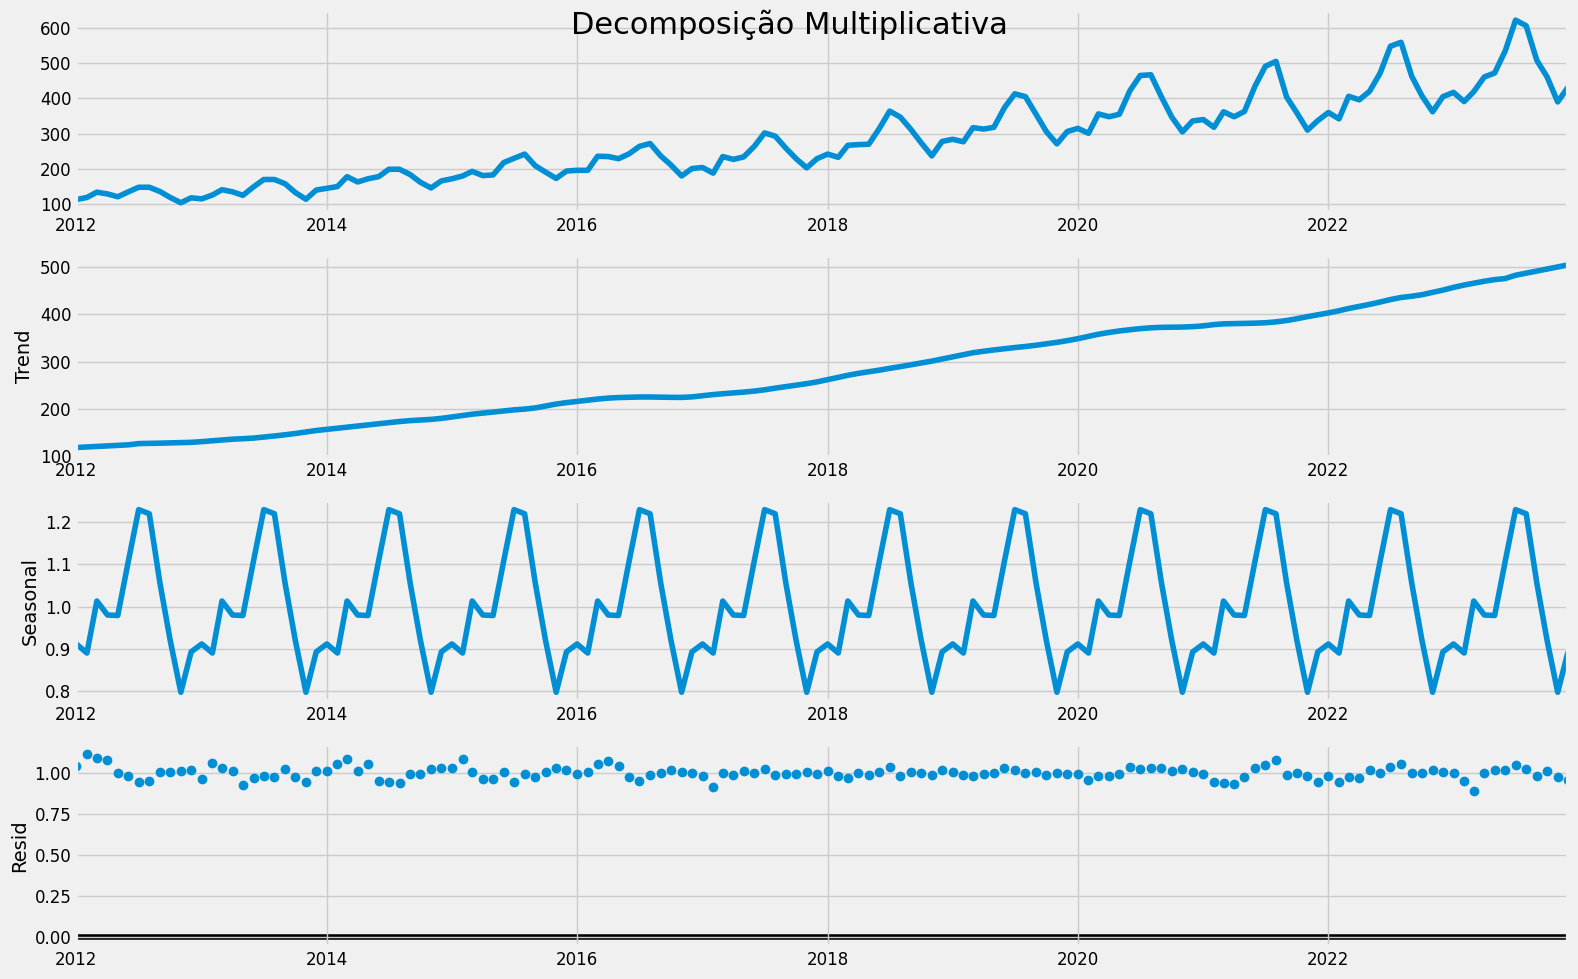

In [30]:
# Plot - 1 grafico - valor do veiculo
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
plt.show()

In [31]:
# Decomposição Aditiva
decomposicao_aditiva = sm.tsa.seasonal_decompose(dados_serie, 
                                                 model = 'aditive', 
                                                 extrapolate_trend = 'freq')

In [32]:
# Tipo do objeto
type(decomposicao_aditiva)

statsmodels.tsa.seasonal.DecomposeResult

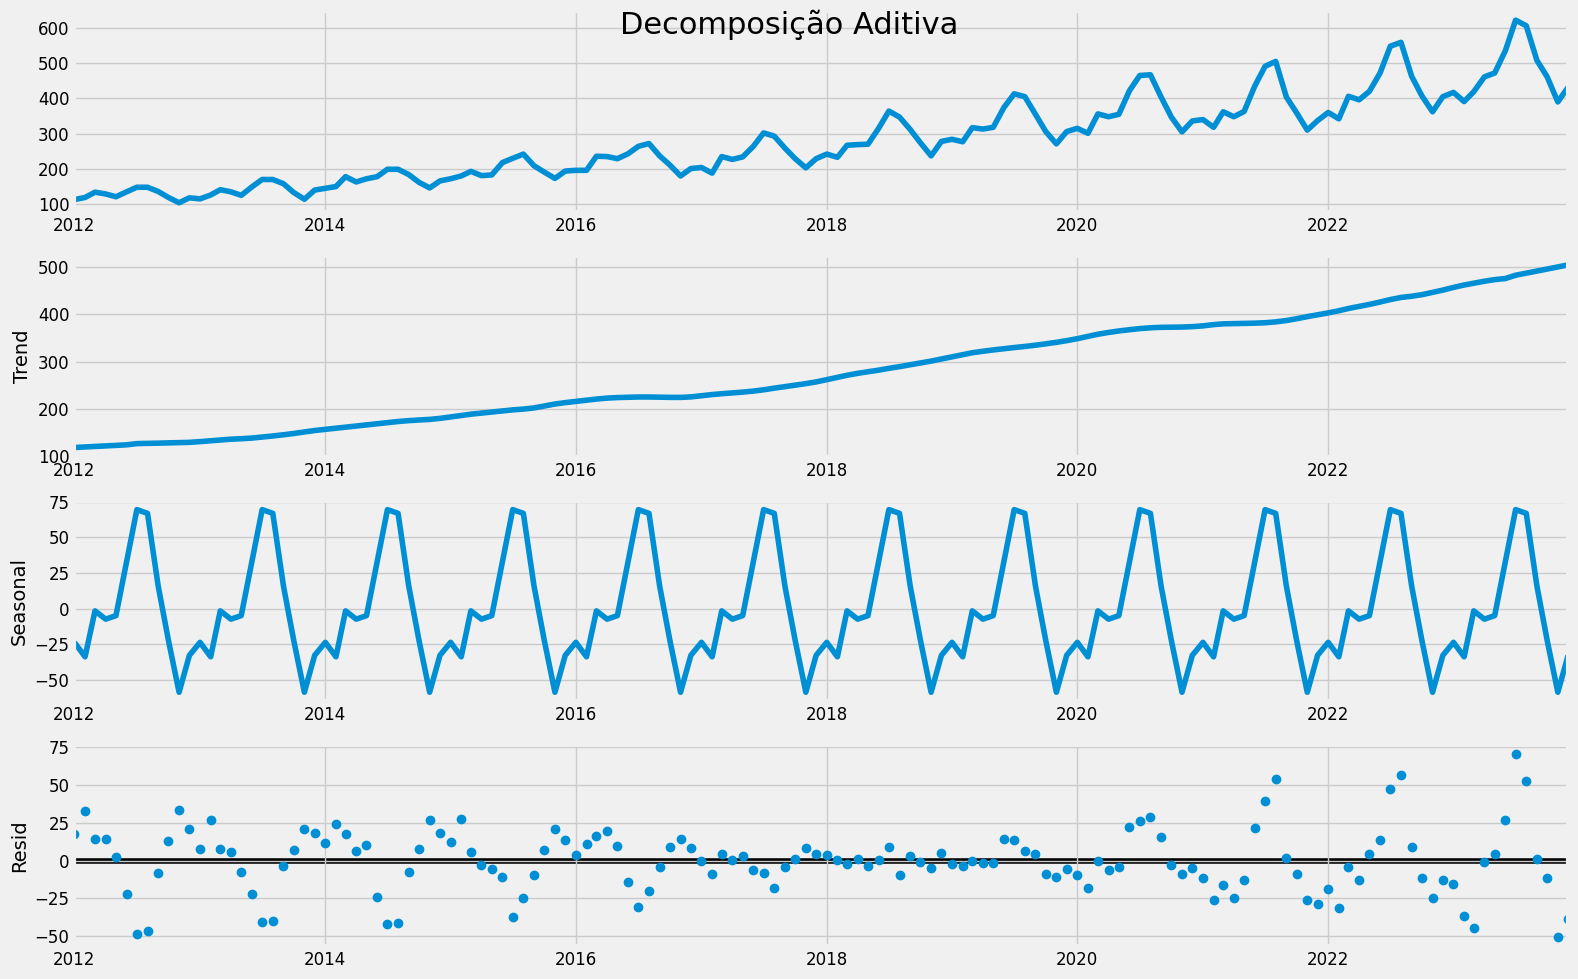

In [33]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 22)
plt.show()

### <font color=darkgreen> Análise da Decomposição da Série</font>

No gráfico acima podemos ver os componentes da série temporal:

1- A primeira linha do gráfico mostra os dados observados, em nosso exemplo o número de veículos produzidos.

2- A segunda linha mostra a tendência da série, que claramente é uma tendência de crescimento, ou seja, o número de veículos produzidos tende a crescer ao longo do tempo. (podemos usar análise dinâmica através das Series temporais, não seomente prever valores, mas prever os valores em um certo momento de tempo)

3- A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda, momentos em que temos valores maiores ou menores do número de veículos produzidos. Isso talvez possa ser explicado por eventos baseados em calendário (verão, inverno, férias escolares, etc...).

4- A quarta linha é o componete irregular ou resíduo. - (Base da escolha nesse caso da decomposição multiplicativa)

Definir extrapolate_trend = 'freq' remove valores NaN na tendência e nos resíduos (se existirem, claro).

Se você observar atentamente os resíduos da decomposição aditiva, ela permanece com algum padrão (oq não é bom! Não queremos padrão nos residuos, queremos comportamento aleatório nos resíduos). A decomposição multiplicativa, no entanto, parece bastante aleatória, o que é bom, fazendo o metodo da decomposição multiplicativa melhor para essa série.

Então, idealmente, a decomposição multiplicativa deve ser preferida para essa série específica.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria saída decomposicao_multiplicativa. Vamos extraí-los e colocá-los em uma tabela de dados.

### <font color=darkred> <b> Extração dos Componentes da Série Temporal </b> </font> 

Regra de extração:

**Valores Reais = (sazonal * tendência * resíduo)**

In [34]:
# Concatena o resultado da decomposição da série
dados_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

In [35]:
# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

In [36]:
# Mostra o resultado
dados_serie_reconstruida.head()

,Sazonalidade,Tendência,Resíduos,Valores_Observados
mes,,,,
2012-01-01,0.912060,118.864948,1.042321,113.0
2012-02-01,0.890694,119.990822,1.113449,119.0
2012-03-01,1.013408,121.116696,1.091733,134.0
2012-04-01,0.980383,122.242570,1.076395,129.0
2012-05-01,0.979185,123.368444,1.001651,121.0


In [37]:
# Dados originais
dados_serie.head()

,veiculos_produzidos
mes,
2012-01-01,113
2012-02-01,119
2012-03-01,134
2012-04-01,129
2012-05-01,121


Se você checar, o produto das colunas Sazonalidade, Tendência e Resíduos deve ser exatamente igual a Valores_Observados.

Por exemplo:

- Série na data 2012-01-01 = 113.0
- Série na data 2012-01-01 = Sazonalidade x Tendência x Resíduos = 0.912060 x 118.864948 x 1.042321 = 113.0

In [38]:
# Cálculo em Python
valor_observado = 0.912060 * 118.864948 * 1.042321
print(valor_observado)

113.00006722133676


Ou seja, isso comprova como uma série temporal é na verdade o conjunto de componentes que podem ser extraídos, transformados, analisados e usados para fazer previsões. 

Quando aplicamos o elemento tempo, podemos decompor o valor 113 em 3 valores = Sazonalidade, Tendencia e Residuos
aplicando a decomposicão, observamos q a quantidade produzida 113, considerando o tempo, tem de fato diferentes partes e conseguimos extrair cada uma dessas partes para então realizar o processo de análise!

Concluímos assim a primeira parte do Lab. Vamos para a segunda parte onde vamos verificar a Estacionaridade, etapa 4 do processo de AST. Uauuuuu! 